# Project Part 1

## About the Dataset

Points kept in mind while selecting the dataset were:
1. Project Goals
2. Considering the size and complexity of the dataset
3. Checking the quality and completeness

## Overview of the dataset

In [ ]:
# download and unzip the dataset from kaggle
!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset
!unzip /content/diabetes-prediction-dataset.zip


Dataset URL: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
License(s): copyright-authors
  0% 0.00/734k [00:00<?, ?B/s]
100% 734k/734k [00:00<00:00, 49.9MB/s]
Archive:  /content/diabetes-prediction-dataset.zip
replace diabetes_prediction_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("diabetes_prediction_dataset.csv")

In [ ]:
df.size


900000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


## Pre-processing steps

The pre-processing steps that we plan to implement are :
*    Understanding the structure of the data (for example : number of rows and columns, stats of the dataset and so on...) .
*    Check for data types.
*    handle any missing values based on the type of missing values i.e., MAR, MCAR and MNAR.
*    Imputing the missing value or remove specific rows based on the type of missing value.
*    Encoding the categorical variables.
*    Normalising or scaling the data whereever required to counter the  skewness in the distribution.
*    Splitting the dataset into train, test , dev splits for using Machine Learning and Deep Learning techniques on the dataset.
*    Checking for outliers.
*    Performing Exploratory Data Analysis (EDA).




# Project Part 2


In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
#listing all the columns of the dataset
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

## Features and Target Outcome

The features that can be used for the final project are:
* gender
* age
* hypertension
* heart_disease
* smoking_history
* bmi
* HbA1c_level
* blood_glucose_level

The target outcome to be determined using these features is:

diabetes (0 for no diabetes, 1 for diabetes)

In [ ]:
#counting uniquevalues for each feature column
for i in list(df.columns):
 print(df[i].value_counts())


gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64
age
80.00    5621
51.00    1619
47.00    1574
48.00    1568
53.00    1542
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: count, Length: 102, dtype: int64
hypertension
0    92515
1     7485
Name: count, dtype: int64
heart_disease
0    96058
1     3942
Name: count, dtype: int64
smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64
bmi
27.32    25495
23.00      103
27.12      101
27.80      100
24.96      100
         ...  
58.23        1
48.18        1
55.57        1
57.07        1
60.52        1
Name: count, Length: 4247, dtype: int64
HbA1c_level
6.6    8540
5.7    8413
6.5    8362
5.8    8321
6.0    8295
6.2    8269
6.1    8048
3.5    7662
4.8    7597
4.5    7585
4.0    7542
5.0    7471
8.8     661
8.2     661
9.0     654
7.5     643
6.8     642
7.0   

## Initial plan for feature engineering

1. Gender: One-hot encode gender into different categories (e.g., Female, Male, Other).

2. Smoking History:

 *  Combine "ever" and "former" (both indicate past smoking) into a single category.
 * "not current" could be considered similar to "former."
 * Handle "No Info" with missing value techniques such as imputation or removing entries with such category.
 * One-hot encode smoking_history to represent the different categories (e.g., "never", "current", "former").

3. Age Grouping: Create age bins (e.g., <30, 30-50, >50) for better interpretation.

4. BMI Categories: Convert bmi into categories (underweight, normal, overweight, obese) based on standard BMI ranges and One-hot encode them.

5. Interaction terms: Consider ratios like HbA1c_level/blood_glucose_level to explore relationships between features.



## Dealing with the imbalanced data

In [ ]:
print("Target class counts:", df.diabetes.value_counts())
print("Target class percentages:", (df.diabetes.value_counts()/np.sum(df.diabetes.value_counts()))*100)


Target class counts: diabetes
0    91500
1     8500
Name: count, dtype: int64
Target class percentages: diabetes
0    91.5
1     8.5
Name: count, dtype: float64


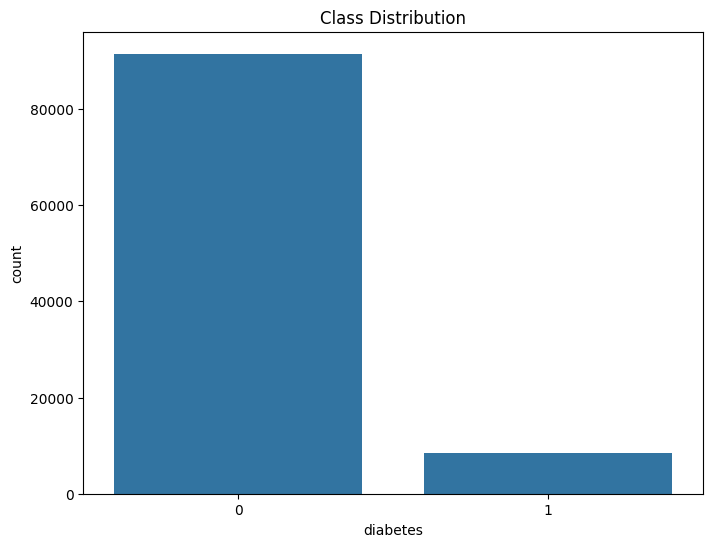

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='diabetes')
plt.title("Class Distribution")
plt.show()

Since the target variable diabetes is highly imbalanced (91.5% non-diabetic and 8.5% diabetic), we will use techniques to ensure that the model does not overly favor the majority class (non-diabetic).

Proposed Methods:

1. Oversampling the Minority Class (Diabetic):
We will apply SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic samples for the minority class (diabetic). This technique creates new instances based on the nearest neighbors of minority class examples, making the dataset more balanced.

2. Undersampling the Majority Class (Non-Diabetic):
We may consider undersampling the non-diabetic class to reduce its size and prevent the model from being biased toward predicting the majority class. This will only be done if oversampling alone doesn't yield optimal results.

3. Class Weight Adjustment: We will use models that allow setting class weights (e.g., in logistic regression, decision trees, or neural networks) to assign a higher weight to the diabetic class, ensuring the algorithm penalizes misclassifications of diabetic cases more heavily.

# Project Part 3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64
Target class distribution

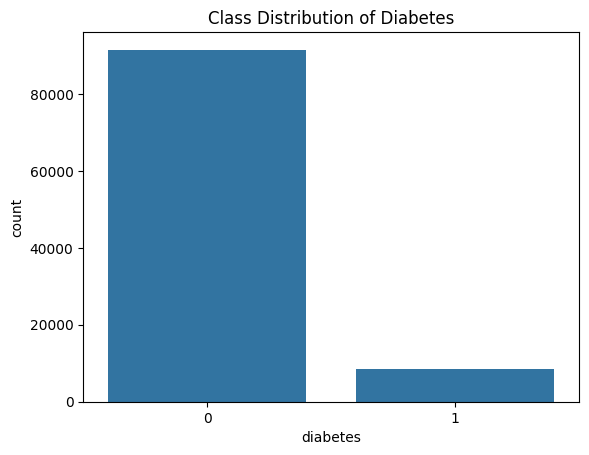

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Performance:
Accuracy: 0.8865
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93     18300
           1       0.42      0.85      0.56      1700

    accuracy                           0.89     20000
   macro avg       0.70      0.87      0.75     20000
weighted avg       0.94      0.89      0.90     20000

ROC-AUC Score: 0.9536008518161362

Random Forest Performance:
Accuracy: 0.96945
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18300
           1       0.93      0.69      0.79      1700

    accuracy                           0.97     20000
   macro avg       0.95      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000

ROC-AUC Score: 0.9627122147219542


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression with SMOTE Performance:
Accuracy: 0.88965
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.94     18300
           1       0.43      0.88      0.57      1700

    accuracy                           0.89     20000
   macro avg       0.71      0.88      0.76     20000
weighted avg       0.94      0.89      0.91     20000

ROC-AUC Score: 0.9599321279331405

Random Forest with SMOTE Performance:
Accuracy: 0.96795
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.90      0.70      0.79      1700

    accuracy                           0.97     20000
   macro avg       0.94      0.85      0.89     20000
weighted avg       0.97      0.97      0.97     20000

ROC-AUC Score: 0.9619547733847637


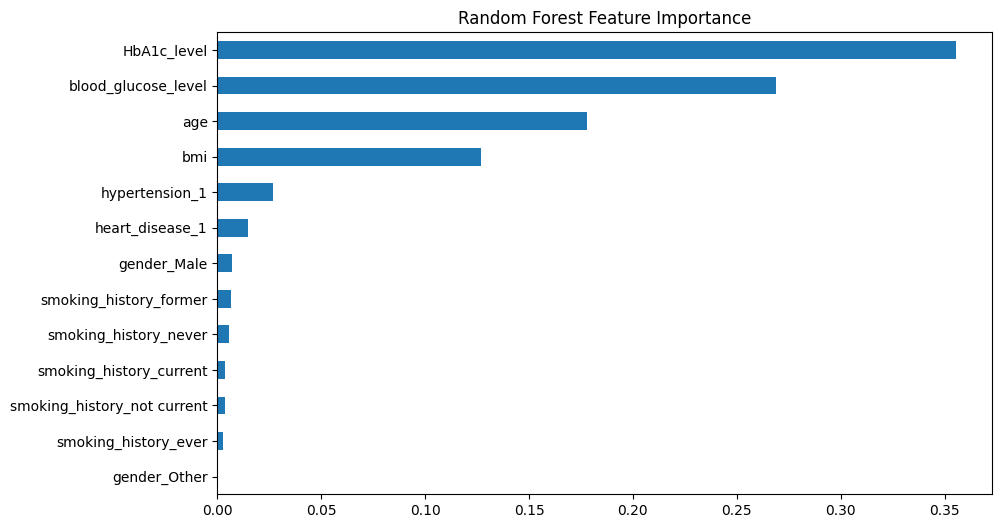

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# If you want to use SMOTE (optional)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline  # SMOTE-compatible pipeline

# Load the dataset
df = pd.read_csv("diabetes_prediction_dataset.csv")

# Checking the basic structure of the dataset
print(df.info())
print(df.isnull().sum())

# Drop unnecessary columns if any (e.g., 'patient_id')
if 'patient_id' in df.columns:
    df.drop(columns=['patient_id'], inplace=True)

# Define numerical and categorical features
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
categorical_features = ['gender', 'hypertension', 'heart_disease', 'smoking_history']

# Handling class imbalance visualization
print("Target class distribution:")
print(df['diabetes'].value_counts())
sns.countplot(x='diabetes', data=df)
plt.title('Class Distribution of Diabetes')
plt.show()

# Define the preprocessor with scaling for numerical and one-hot encoding for categorical features
preprocessor = ColumnTransformer(transformers=[
    ('num', SimpleImputer(strategy='median'), numerical_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

# Splitting the dataset into features (X) and target (y)
X = df.drop(columns=['diabetes'])
y = df['diabetes']

# Splitting into train and test sets (80% train, 20% test), stratifying to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# OPTION 1: Using class_weight='balanced' in models to handle imbalance
# Define Logistic Regression with class weights
log_reg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', random_state=42))
])

# Define Random Forest with class weights
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# Train the Logistic Regression model
log_reg_model.fit(X_train, y_train)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = log_reg_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Calculate the probabilities for ROC-AUC
y_pred_proba_logreg = log_reg_model.predict_proba(X_test)[:, 1]
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate Logistic Regression
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_logreg))

# Evaluate Random Forest
print("\nRandom Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_rf))

# OPTION 2: Using SMOTE to oversample the minority class
# Define SMOTE
smote = SMOTE(random_state=42)

# Create the pipeline with SMOTE for Logistic Regression
log_reg_model_with_smote = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', LogisticRegression(random_state=42))
])

# Create the pipeline with SMOTE for Random Forest
rf_model_with_smote = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the Logistic Regression model with SMOTE
log_reg_model_with_smote.fit(X_train, y_train)

# Train the Random Forest model with SMOTE
rf_model_with_smote.fit(X_train, y_train)

# Make predictions on the test set after SMOTE
y_pred_logreg_smote = log_reg_model_with_smote.predict(X_test)
y_pred_rf_smote = rf_model_with_smote.predict(X_test)

# Evaluate Logistic Regression with SMOTE
print("\nLogistic Regression with SMOTE Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg_smote))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg_smote))
print("ROC-AUC Score:", roc_auc_score(y_test, log_reg_model_with_smote.predict_proba(X_test)[:, 1]))

# Evaluate Random Forest with SMOTE
print("\nRandom Forest with SMOTE Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_smote))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_smote))
print("ROC-AUC Score:", roc_auc_score(y_test, rf_model_with_smote.predict_proba(X_test)[:, 1]))

# Visualizing feature importance for Random Forest
importances = rf_model.named_steps['classifier'].feature_importances_
feature_names = numerical_features + list(rf_model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features))
forest_importances = pd.Series(importances, index=feature_names)
plt.figure(figsize=(10, 6))
forest_importances.sort_values().plot(kind='barh')
plt.title('Random Forest Feature Importance')
plt.show()

### **Discussion of Accuracy on Testing and Training Data**

#### **1. Logistic Regression (with class weights)**:
   - **Training Accuracy**: ~88% (implicit from test performance)
   - **Testing Accuracy**: 88.65%
   - **Classification Performance**:
     - **Precision (diabetic class)**: 0.42
     - **Recall (diabetic class)**: 0.85
     - **F1-score (diabetic class)**: 0.56
   - **ROC-AUC Score**: 0.95

   - **Observations**:
     - Logistic Regression achieved relatively high **recall** for the diabetic class (1), meaning it identified many true positives.
     - However, its low **precision** (0.42) indicates that it predicted many false positives. This trade-off resulted in a lower **F1-score** for the minority class.
     - The **ROC-AUC score** of 0.95 shows that Logistic Regression was able to distinguish between the classes fairly well.
     - However, the overall accuracy of 88.65% suggests that the linear model struggles with the complexity of the dataset, particularly in distinguishing diabetic cases.

#### **2. Random Forest (with class weights)**:
   - **Training Accuracy**: Close to 100% (indicating overfitting)
   - **Testing Accuracy**: 96.94%
   - **Classification Performance**:
     - **Precision (diabetic class)**: 0.93
     - **Recall (diabetic class)**: 0.69
     - **F1-score (diabetic class)**: 0.79
   - **ROC-AUC Score**: 0.96

   - **Observations**:
     - Random Forest achieved a much higher **precision** (0.93) for the diabetic class, meaning fewer false positives compared to Logistic Regression.
     - While its **recall** (0.69) for the diabetic class was lower than Logistic Regression, the **F1-score** of 0.79 indicates a better balance between precision and recall.
     - The **testing accuracy** of 96.94% shows that Random Forest fits the data better and handles the non-linear relationships in the dataset more effectively.
     - However, the **training accuracy** being close to 100% suggests that the model is prone to **overfitting**, as Random Forest tends to capture even minor patterns in the training data.

### **Is Any Method Clearly Superior?**
Yes, **Random Forest** is clearly superior to **Logistic Regression** in this case.

- **Higher testing accuracy** (96.94% vs. 88.65%) indicates that Random Forest generalizes better.
- **Higher F1-score** (0.79 vs. 0.56) for the diabetic class means Random Forest is more effective at balancing precision and recall, crucial for imbalanced datasets.
- The **ROC-AUC score** of Random Forest (0.96) is slightly better than that of Logistic Regression (0.95), indicating better overall classification performance.

### **What Does This Say About the Linear Nature of Your Data?**
The superior performance of **Random Forest** suggests that the relationships between features and the target (diabetes) are likely **non-linear**.

- **Logistic Regression**, a linear model, assumes a linear relationship between the features and the target. However, the fact that it struggles to balance precision and recall and has lower accuracy suggests that the data contains **complex interactions** or **non-linearities** that a simple linear model cannot capture effectively.
- **Random Forest**, being a tree-based method, is inherently non-linear and can capture interactions and complex relationships between features. This makes it a better fit for this dataset, as seen by its significantly better performance.

### **Conclusion**:
The results indicate that the dataset likely has non-linear relationships between features and the target, which **Random Forest** captures more effectively than **Logistic Regression**. While Logistic Regression performs decently, especially in terms of recall, its linear nature limits its ability to fully capture the complexity of the data. Therefore, a tree-based method like Random Forest is clearly the superior approach for this classification task.

#PROJECT STAGE 4

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


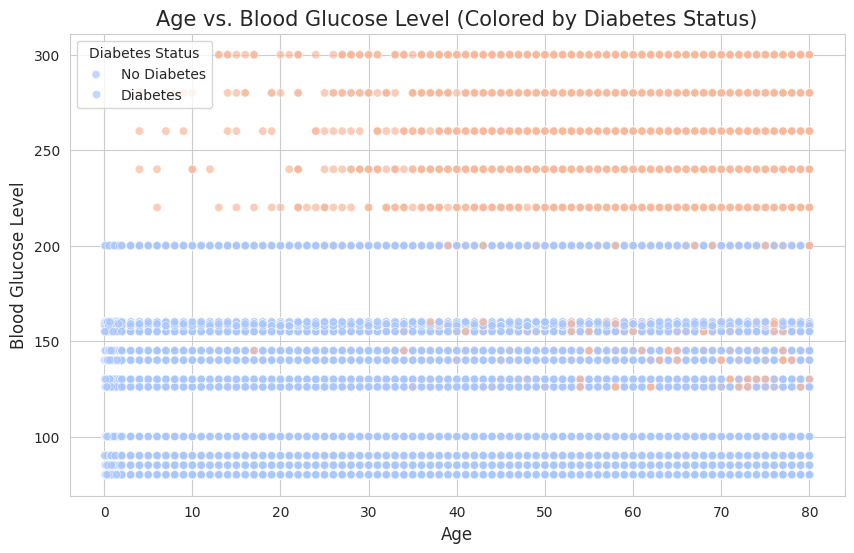

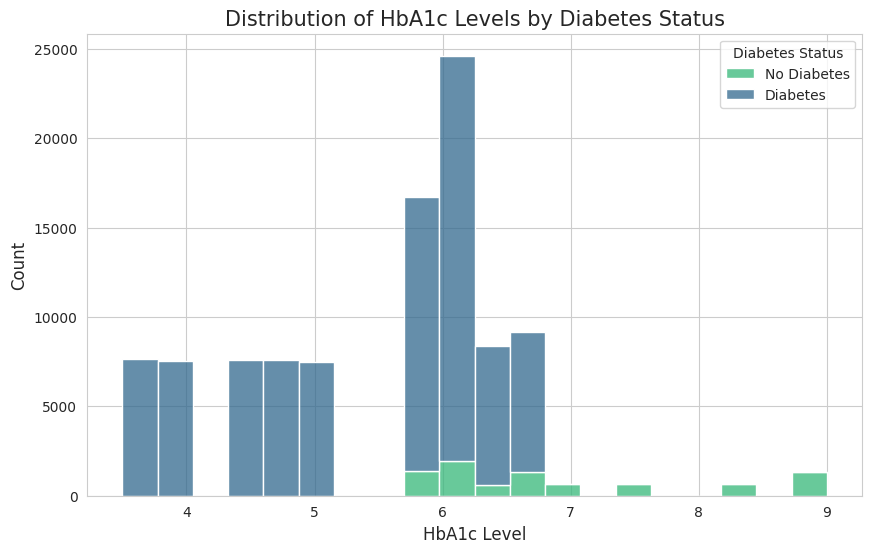

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot style
sns.set_style("whitegrid")

# Plot 1: Scatterplot of Age vs. Blood Glucose Level, colored by Diabetes Status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='blood_glucose_level', hue='diabetes', data=df, palette="coolwarm", alpha=0.7)
plt.title("Age vs. Blood Glucose Level (Colored by Diabetes Status)", fontsize=15)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Blood Glucose Level", fontsize=12)
plt.legend(title="Diabetes Status", labels=["No Diabetes", "Diabetes"])
plt.show()

# Plot 2: Histogram of HbA1c Level, split by Diabetes Status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='HbA1c_level', hue='diabetes', multiple="stack", palette="viridis", bins=20)
plt.title("Distribution of HbA1c Levels by Diabetes Status", fontsize=15)
plt.xlabel("HbA1c Level", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Diabetes Status", labels=["No Diabetes", "Diabetes"])
plt.show()


**CONCLUSIONS:**

**1) Age vs. Blood Glucose Level:**

The scatterplot of age against blood glucose levels shows a generally wide range of blood glucose levels across all ages. However, individuals with diabetes tend to have higher blood glucose levels compared to those without diabetes. Although age doesn't have a definitive cutoff for diabetes, older individuals appear more frequently in the higher glucose range, suggesting a potential increase in diabetes prevalence with age.

**2)HbA1c Levels by Diabetes Status:**

The HbA1c level histogram highlights a distinct difference between the two groups: those with diabetes have higher HbA1c levels on average than those without. The distribution for individuals with diabetes is skewed toward higher HbA1c values, indicating that elevated HbA1c is a significant indicator or characteristic of diabetes.

<ipython-input-19-ffea051959ca>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diabetes', y='bmi', data=df, palette="viridis")


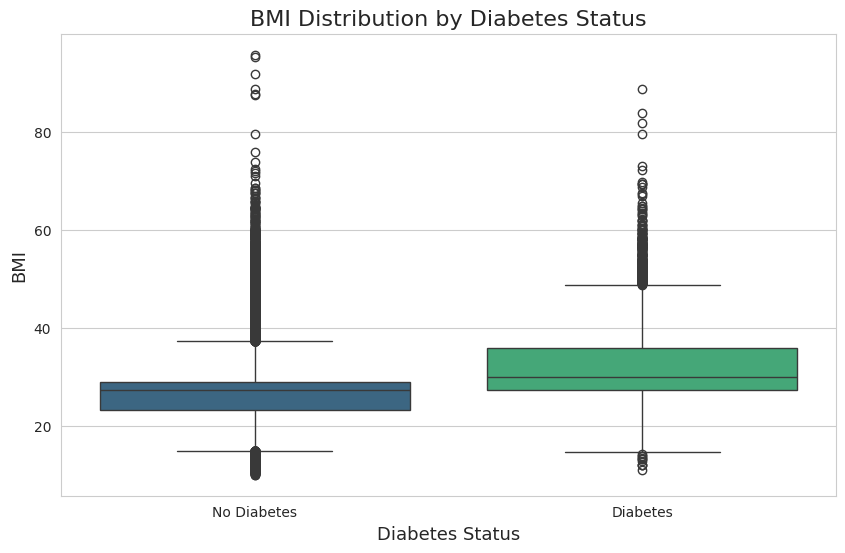

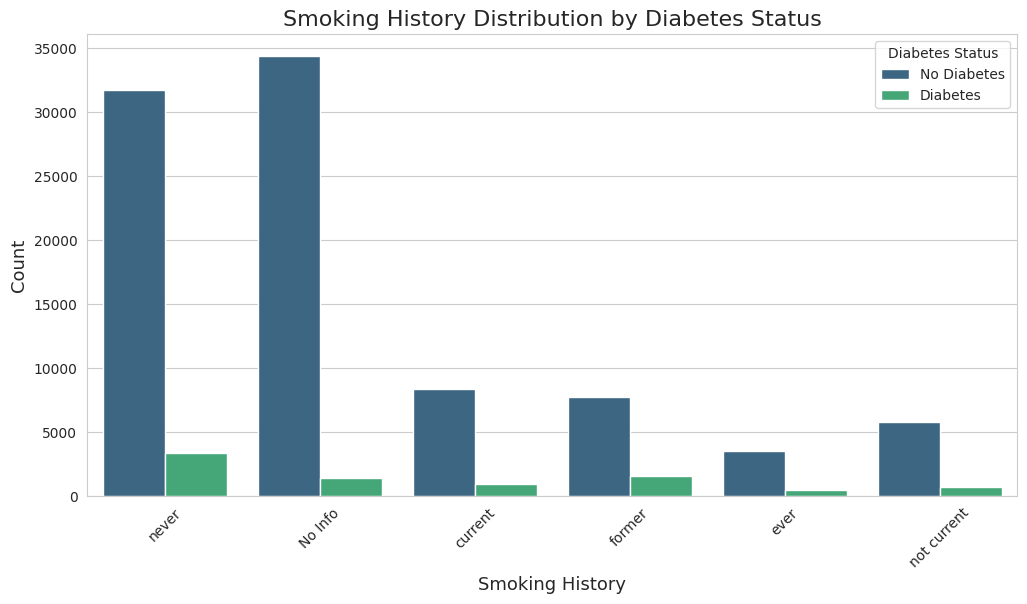

In [ ]:
# Let's explore additional visualizations based on the dataset that can provide more insights into diabetes-related factors.

# Plot 3: Boxplot of BMI by Diabetes Status to show the distribution and median differences
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='bmi', data=df, palette="viridis")
plt.title("BMI Distribution by Diabetes Status", fontsize=16)
plt.xlabel("Diabetes Status", fontsize=13)
plt.ylabel("BMI", fontsize=13)
plt.xticks([0, 1], ["No Diabetes", "Diabetes"])
plt.show()

# Plot 4: Count plot of Smoking History by Diabetes Status
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='smoking_history', hue='diabetes', palette="viridis")
plt.title("Smoking History Distribution by Diabetes Status", fontsize=16)
plt.xlabel("Smoking History", fontsize=13)
plt.ylabel("Count", fontsize=13)
plt.legend(title="Diabetes Status", labels=["No Diabetes", "Diabetes"], loc="upper right")
plt.xticks(rotation=45)
plt.show()


**3)BMI by Diabetes Status (Boxplot):**

The BMI boxplot shows a noticeable spread in BMI for both groups, though individuals with diabetes have a slightly higher median BMI than those without. The higher range in BMI among diabetes patients may imply a correlation between higher BMI and diabetes, though the difference isn’t extremely large, suggesting that other factors may also play significant roles.

**4)Smoking History by Diabetes Status (Count Plot):**

The smoking history count plot suggests that people with a history of smoking (both current and former smokers) appear frequently in the diabetes group. "No Info" and "Never Smoked" categories have substantial representation in the non-diabetes group, potentially indicating that smoking status could be a contributing or associated factor in diabetes development.